In [1]:
import os
import sys
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from PIL import Image

root = os.path.abspath(os.path.join(os.path.dirname("__file__"), '../../'))
sys.path.append(root)

from src.data.transforms.transforms import RandomHorizontallyFlip, RandomScaleCrop, AugCompose

# Check Dataset

### Check raw image

In [2]:
%cd ../../
path = './data/demo_seg_pytorch/split/demo_split.pkl'
df = pd.read_pickle(path)

/home/fujisaki/Works/BaseModel


In [3]:
img_path = df.loc[:, 'img_path'][:5]
gt_path = df.loc[:, 'gt_path'][:5]

#### __Raw Image__

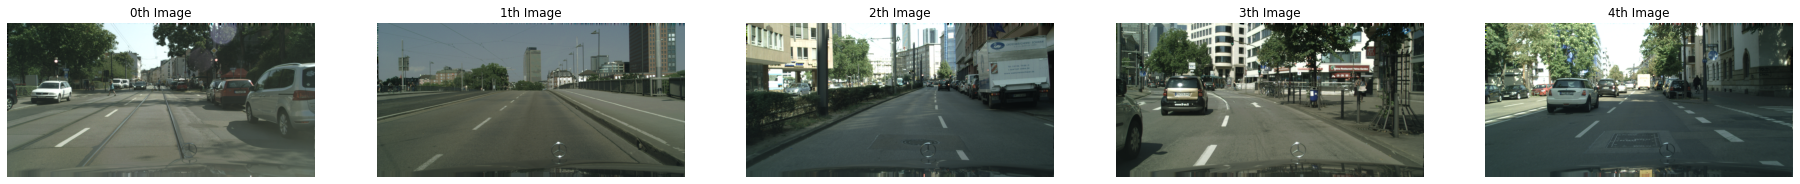

In [4]:
plt.figure(figsize=(32,24))

for i, img in enumerate(img_path):
    
    plt.subplot(151+i) 
    plt.imshow(Image.open(img)) 
    plt.title('{}th Image'.format(i))
    plt.axis("off")

plt.show()
plt.close()

#### __Horizontal Flip__

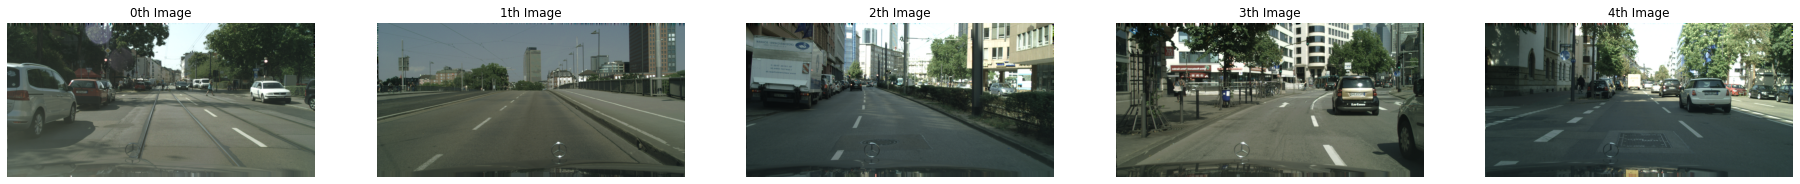

In [5]:
plt.figure(figsize=(32,24))

for i, (img, gt) in enumerate(zip(img_path, gt_path)):
    
    img = Image.open(img)
    gt = Image.open(gt)
    
    n_img, _ = RandomHorizontallyFlip(0.5)(img, gt)
    
    plt.subplot(151+i) 
    plt.imshow(n_img) 
    plt.title('{}th Image'.format(i))
    plt.axis("off")

plt.show()
plt.close()

#### __Scale Crop__

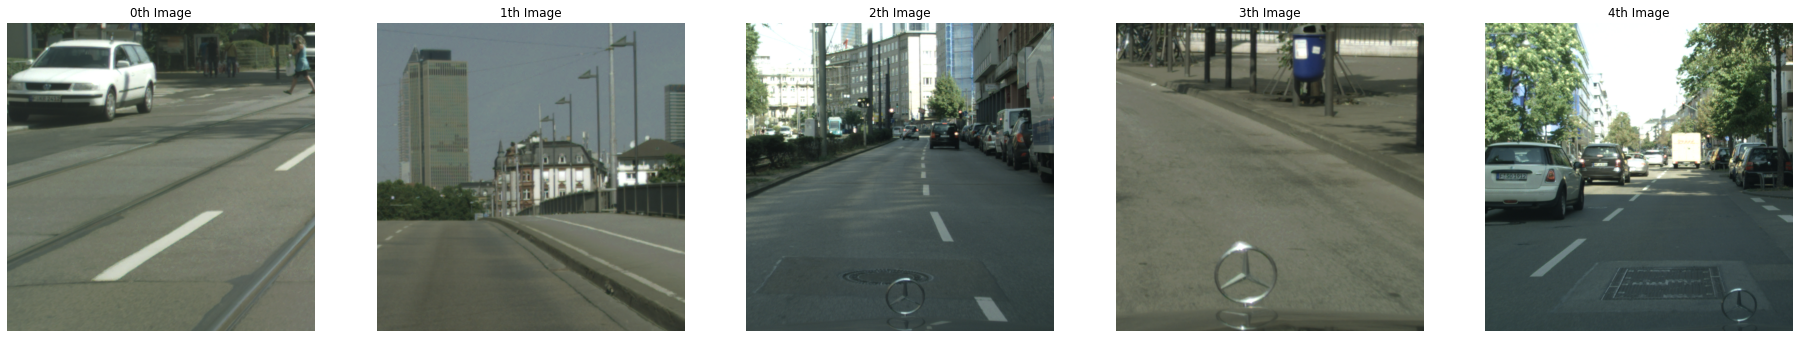

In [6]:
plt.figure(figsize=(32,24))

for i, (img, gt) in enumerate(zip(img_path, gt_path)):
    
    img = Image.open(img)
    gt = Image.open(gt)
    n_img, _ = RandomScaleCrop([1024, 1024])(img, gt)
    
    plt.subplot(151+i) 
    plt.imshow(n_img) 
    plt.title('{}th Image'.format(i))
    plt.axis("off")

plt.show()
plt.close()

#### __Horizontal Flip + Scale Crop__

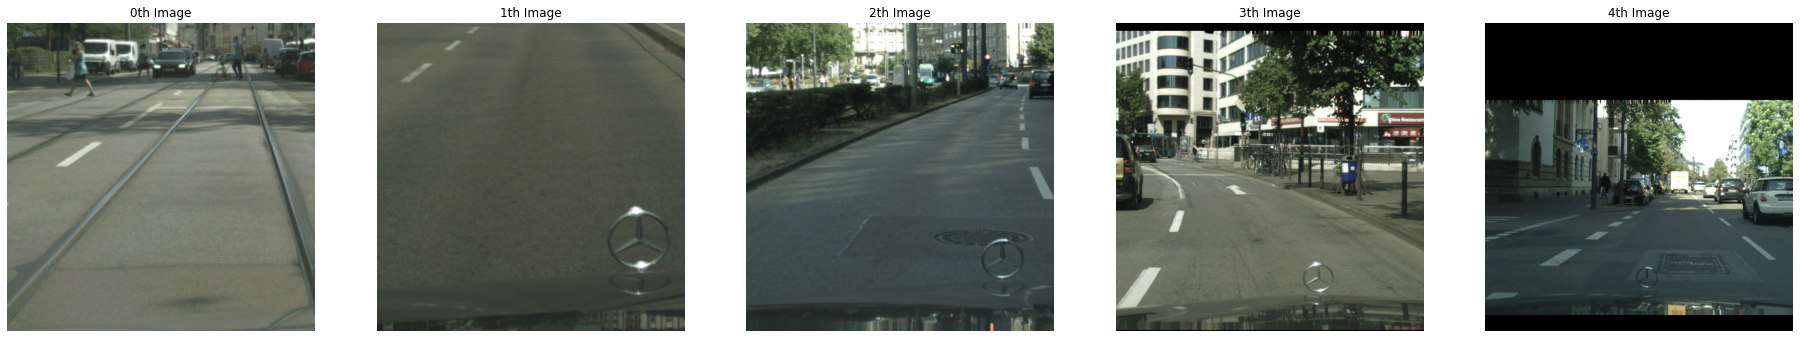

In [7]:
plt.figure(figsize=(32,24))

for i, (img, gt) in enumerate(zip(img_path, gt_path)):
    
    img = Image.open(img)
    gt = Image.open(gt)
    
    n_img, _ = AugCompose([RandomHorizontallyFlip(0.5),
                         RandomScaleCrop([1024, 1024])])(img, gt)
    
    plt.subplot(151+i) 
    plt.imshow(n_img) 
    plt.title('{}th Image'.format(i))
    plt.axis("off")

plt.show()
plt.close()